In [1]:
from constants import *
import os
import pandas as pd
from training_model_inception import trainInception
from stroke import *
#from training_model_knnsktime import trainKNN
#from training_model_shapeletClass import trainShapelet
#from training_model_cnn import trainCNN

In [2]:
pathToCVSData = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV'

listStrokesTrain = []
listStrokesValidation = []

for folder in sorted(os.listdir(pathToCVSData)):
    pathToFolder = os.path.join(pathToCVSData, folder)
    if folder == "train":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesTrain.append(stroke)

    if folder == "validation":
        for subfolder in sorted(os.listdir(pathToFolder)):
            if subfolder in SELECTED_TRICKS:
                pathToSubFolder = os.path.join(pathToFolder, subfolder)
                for file in sorted(os.listdir(pathToSubFolder)):
                        strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                        stroke = Stroke(data=strokeData, label=subfolder, id=file)
                        listStrokesValidation.append(stroke)

for stroke in listStrokesTrain:
    #stroke.smootheningData()
    stroke.normalize()

for stroke in listStrokesValidation:
    #stroke.smootheningData()
    stroke.normalize()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 56, 200)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 56, 32)               6400      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 56, 200)              0         ['input_1[0][0]']             
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 56, 32)               40960     ['conv1d[0][0]']          

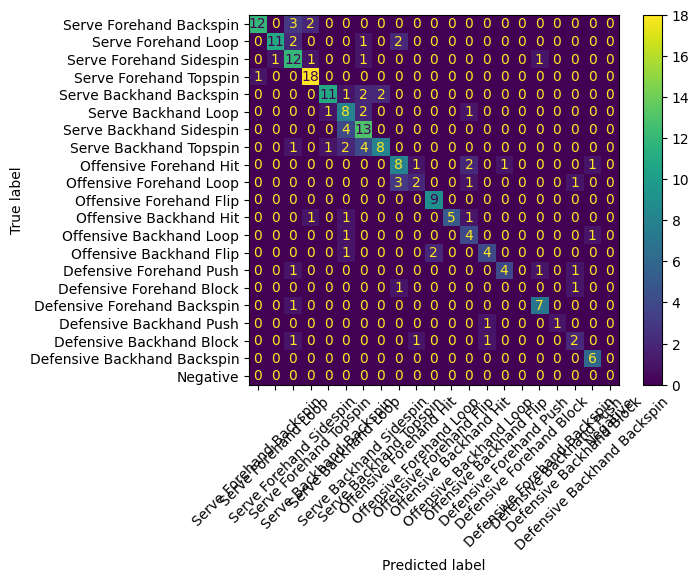

In [3]:
trainInception(listStrokesTrain, listStrokesValidation)

Epoch 1/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7830 - accuracy: 0.2193 - val_loss: 1.7896 - val_accuracy: 0.2609
Epoch 2/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7895 - accuracy: 0.2544 - val_loss: 1.7886 - val_accuracy: 0.2609
Epoch 3/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7887 - accuracy: 0.2544 - val_loss: 1.7877 - val_accuracy: 0.2609
Epoch 4/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7881 - accuracy: 0.2544 - val_loss: 1.7870 - val_accuracy: 0.2609
Epoch 5/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7875 - accuracy: 0.2544 - val_loss: 1.7864 - val_accuracy: 0.2609
Epoch 6/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7870 - accuracy: 0.2544 - val_loss: 1.7858 - val_accuracy: 0.2609
Epoch 7/200
228/228 [==============================] - 1s 3ms/step - loss: 1.7866 - accuracy: 0.2544 - val_loss: 1.7853 - val_accuracy: 0.2609

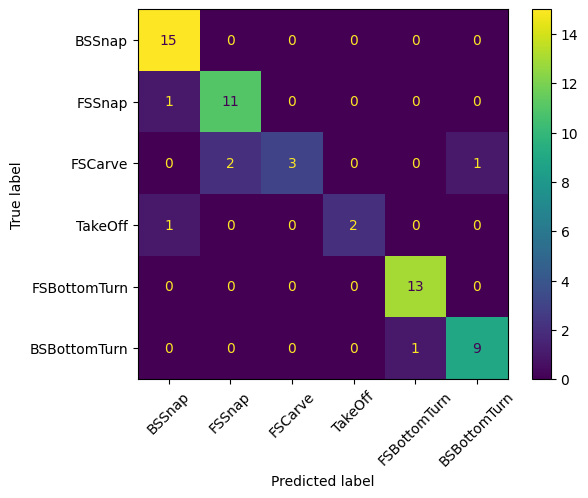

In [5]:
trainCNN(session.tricks)

{'n_neighbors': 3, 'distance': 'dtw', 'weights': 'distance', 'score': 0.7457627118644068}
{'n_neighbors': 3, 'distance': 'euclidean', 'weights': 'distance', 'score': 0.7457627118644068}
{'n_neighbors': 3, 'distance': 'squared', 'weights': 'distance', 'score': 0.7457627118644068}
Time to predict:  0.011361837387084961
[5 4 5 5 5 4 5 4 5 5 0 0 0 1 1 0 0 0 0 1 0 0 0 0 2 4 4 4 4 4 5 4 5 4 4 5 5
 4 1 0 2 2 1 2 1 1 1 1 1 1 1 5 1 1 1 1 1 0 1]
[5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3]
score:  0.6949152542372882


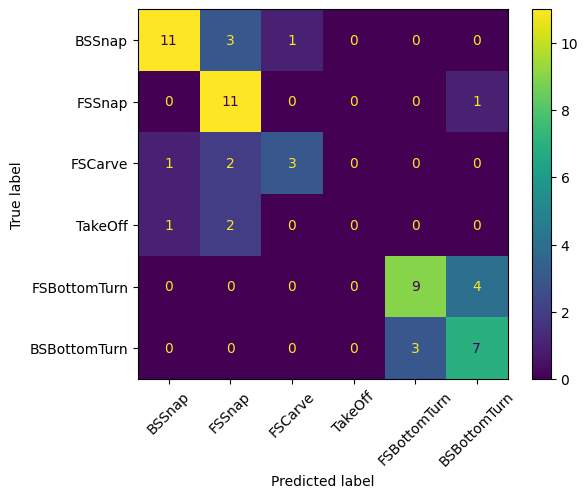

In [6]:
trainKNN(session.tricks)

Time to fit:  32.31748414039612
Time to predict:  1.3005907535552979
[5 5 5 5 5 5 5 5 5 5 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 0 0 2 2 1 1 1 1 2 1 0 1 1 0 1 0 1 1 0 0 1]
[5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4
 4 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3]
0.8135593220338984


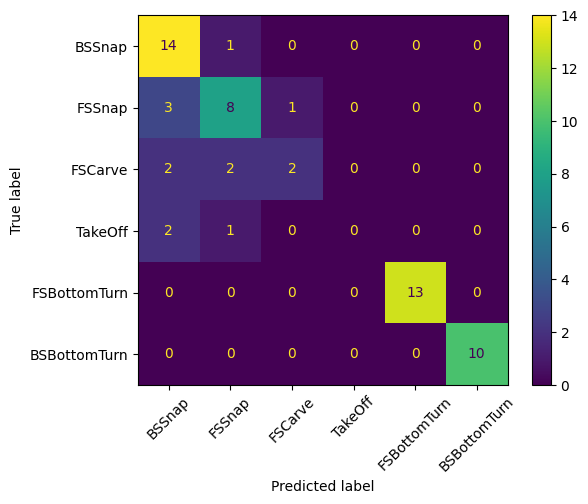

In [7]:
trainShapelet(session.tricks)